## PoC Logic

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib.pyplot import imshow
import numpy as np
import numpy.ma as ma
from sklearn.cluster import KMeans
from PIL import Image
from skimage.color import rgb2hsv
import os

DIR_INP = './room_scenes/'
DIR_OUT = './output/'
DIR_TRN = DIR_OUT+'train/'
DIR_TST = DIR_OUT+'test/'
S_RATIO = 0.8
NO_CLUS = 3

im0 = Image.open(fp='/home/cds/20220927_Pix2PixGAN/sketches/01.jpg')
im1 = im0.resize(size=(256,256))
inp = np.array(im1)

vec = np.uint8(inp.reshape((-1,3)))
kmn = KMeans(random_state=42, init='random', n_clusters=NO_CLUS)
lb0 = kmn.fit_predict(vec)
lb1 = lb0.reshape(256,256)

# RGB Values for various classes
cls = list()
for color in clr.BASE_COLORS.values():
    cls.append(list(round(i*255) for i in color))

# Masked Array corresponding to each class
msk = list()
for i in range(NO_CLUS):
    j = ma.masked_where(lb0==i, lb0)
    k = np.reshape(j, (256,256))
    msk.append(k)

imshow(lb1)
exit

# Segmentation image with RGB values corresponding to class values
seg = np.zeros((lb0.shape[0],3), dtype=np.uint8)
for i, j in enumerate(lb0):
    seg[i] = cls[j]
out = np.reshape(seg, (256,256,3))

fin = np.concatenate((inp,out), axis=1)
img = Image.fromarray(fin)
img.save(fp='/home/cds/20220927_Pix2PixGAN/final.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/home/cds/20220927_Pix2PixGAN/room_scenes/ikea-balcony-organisers-for-the-urban-gardener__1364308450883-s4.jpg'

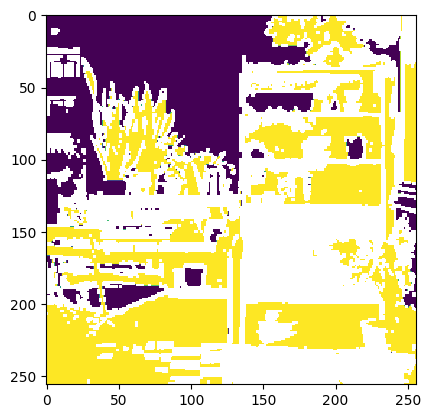

In [62]:
imshow(np.ma.masked_where(np.ma.getmask(msk[0]), lb1))